# 1.Importing Essential Packages



In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer
from fancyimpute import KNN 
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import KNNImputer
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

#pandas option to display rows 
pd.set_option('display.max_rows', 10000)

%matplotlib inline



# 2. Importing Data Set

In [31]:
df = pd.read_csv("J:\Python project\Python Project - Bank Lending\XYZCorp_LendingData.txt", delimiter = '\t', skipinitialspace=True)

c:\users\jason dias\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (17,45,53) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


**2.1 Macro Look of the entire dataset and the dimensions**

In [32]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  float64
 3   funded_amnt                  855969 non-null  float64
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,855969.000,855969.000,855969.000,855969.000,855969.000,855969.000,855969.000,855969.000,855969.000,855969.000,...,11609.000,13288.000,13288.000,13288.000,13288.000,788656.000,13288.000,13288.000,13288.000,855969.000
mean,32240726.286,34762690.042,14745.571,14732.378,14700.061,13.192,436.238,75071.186,18.122,0.312,...,71.487,1.354,2.946,5840.443,61.025,32163.575,0.948,1.524,1.842,0.054
std,22719691.566,23994176.797,8425.340,8419.472,8425.805,4.368,243.727,64264.470,17.424,0.857,...,23.015,1.484,2.595,5108.500,20.018,37699.638,1.442,2.698,2.975,0.227
min,54734.000,70699.000,500.000,500.000,0.000,5.320,15.690,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-4.000,0.000
25%,9067986.000,10792732.000,8000.000,8000.000,8000.000,9.990,260.550,45000.000,11.880,0.000,...,58.500,0.000,1.000,2405.000,47.900,14000.000,0.000,0.000,0.000,0.000
50%,34313546.000,36975319.000,13000.000,13000.000,13000.000,12.990,382.550,65000.000,17.610,0.000,...,75.000,1.000,2.000,4485.500,62.100,23800.000,0.000,0.000,2.000,0.000
75%,54463114.000,58035586.000,20000.000,20000.000,20000.000,15.990,571.560,90000.000,23.900,0.000,...,87.500,2.000,4.000,7701.250,75.300,39900.000,1.000,2.000,3.000,0.000
max,68616867.000,73519693.000,35000.000,35000.000,35000.000,28.990,1445.460,9500000.000,9999.000,39.000,...,223.300,22.000,43.000,83047.000,151.400,9999999.000,15.000,33.000,32.000,1.000


**2.1.2 Splitting data into numeric and non_numeric features for easy identification**

In [33]:
numeric = df.select_dtypes(exclude = 'object')
non_numeric = df.select_dtypes(include = 'object')
print(numeric.head(10))
print(non_numeric.head(10))


        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  int_rate  \
0  1077501    1296599   5000.000     5000.000         4975.000    10.650   
1  1077430    1314167   2500.000     2500.000         2500.000    15.270   
2  1077175    1313524   2400.000     2400.000         2400.000    15.960   
3  1076863    1277178  10000.000    10000.000        10000.000    13.490   
4  1075358    1311748   3000.000     3000.000         3000.000    12.690   
5  1075269    1311441   5000.000     5000.000         5000.000     7.900   
6  1069639    1304742   7000.000     7000.000         7000.000    15.960   
7  1072053    1288686   3000.000     3000.000         3000.000    18.640   
8  1071795    1306957   5600.000     5600.000         5600.000    21.280   
9  1071570    1306721   5375.000     5375.000         5350.000    12.690   

   installment  annual_inc    dti  delinq_2yrs  ...  il_util  open_rv_12m  \
0      162.870   24000.000 27.650        0.000  ...      nan          nan   
1       5

# 3.Data Preparation

**3.1 Identifying and Deleting Features Based on Certain Threshold**

In [34]:
null_cols = df.isnull().mean().sort_values(ascending = False)
null_cols

dti_joint                     0.999
verification_status_joint     0.999
annual_inc_joint              0.999
il_util                       0.986
mths_since_rcnt_il            0.985
total_bal_il                  0.984
inq_last_12m                  0.984
open_acc_6m                   0.984
open_il_6m                    0.984
open_il_24m                   0.984
open_il_12m                   0.984
open_rv_12m                   0.984
open_rv_24m                   0.984
max_bal_bc                    0.984
all_util                      0.984
inq_fi                        0.984
total_cu_tl                   0.984
desc                          0.858
mths_since_last_record        0.847
mths_since_last_major_derog   0.751
mths_since_last_delinq        0.514
next_pymnt_d                  0.296
tot_cur_bal                   0.079
tot_coll_amt                  0.079
total_rev_hi_lim              0.079
emp_title                     0.058
emp_length                    0.050
last_pymnt_d                

**3.2 From Above analysis large number of features have missing data > 50%. All features that have missing data >=50% will be dropped and rest will be imputed.**



In [35]:
df = df.dropna(axis=1, thresh=int(0.5*len(df)))
df.shape

(855969, 52)

In [36]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

emp_title                      49443
emp_length                     43061
title                             33
revol_util                       446
last_pymnt_d                    8862
next_pymnt_d                  252971
last_credit_pull_d                50
collections_12_mths_ex_med        56
tot_coll_amt                   67313
tot_cur_bal                    67313
total_rev_hi_lim               67313
dtype: int64

**3.3 After Analysis There are features with a few missing values, emp_title, emp_length, title seem to be missing at random and will be imputed with unknown.**

In [37]:
df['emp_title'] = df['emp_title'].fillna('unknown')
df['emp_length'] = df['emp_length'].fillna('unknown')  
df['title'] = df['title'].fillna('unknown')


**3.4 revol_util, collections_12_mths_ex_med have a  minute percentage of missing values and will be imputed with 0.**

In [38]:
df['revol_util'] = df['revol_util'].fillna(0)
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)


**3.5 last_pymnt_d and last_credit_pull_d will be imputed with null**


In [39]:
df['last_credit_pull_d'] = df['last_credit_pull_d'].fillna(0)
df['last_credit_pull_d'] = df['last_credit_pull_d'].fillna(0)
df.isnull().sum()

id                                 0
member_id                          0
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                          0
emp_length                         0
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
pymnt_plan                         0
purpose                            0
title                              0
zip_code                           0
addr_state                         0
dti                                0
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths                     0
open_acc                           0
pub_rec                            0
r

In [ ]:
df.total_pymnt_inv.describe()


**3.6 Dropping Features that do not determine y based on the type of feature alone.**


In [40]:
drop_features = ['id','member_id',  'emp_title', 'application_type', 'term', 'next_pymnt_d', 'delinq_2yrs', 'inq_last_6mths', 
                'policy_code', 'collection_recovery_fee', 'initial_list_status']
for col in drop_features:
    df = df.drop(col, axis = 1)
df.notnull().sum()


loan_amnt                     855969
funded_amnt                   855969
funded_amnt_inv               855969
int_rate                      855969
installment                   855969
grade                         855969
sub_grade                     855969
emp_length                    855969
home_ownership                855969
annual_inc                    855969
verification_status           855969
issue_d                       855969
pymnt_plan                    855969
purpose                       855969
title                         855969
zip_code                      855969
addr_state                    855969
dti                           855969
earliest_cr_line              855969
open_acc                      855969
pub_rec                       855969
revol_bal                     855969
revol_util                    855969
total_acc                     855969
out_prncp                     855969
out_prncp_inv                 855969
total_pymnt                   855969
t

# 4.EXPLORATORY ANALYSIS



**4.1 Creating Temporary Column to check default status**

In [41]:
df['status'] = np.where(df.default_ind == 1, 'paid', 'default')
df.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind,status
0,5000.000,5000.000,4975.000,10.650,162.870,B,B2,10+ years,RENT,24000.000,...,Jan-2015,171.620,Jan-2016,0.000,0.000,nan,nan,nan,0,default
1,2500.000,2500.000,2500.000,15.270,59.830,C,C4,< 1 year,RENT,30000.000,...,Apr-2013,119.660,Sep-2013,0.000,0.000,nan,nan,nan,1,paid
2,2400.000,2400.000,2400.000,15.960,84.330,C,C5,10+ years,RENT,12252.000,...,Jun-2014,649.910,Jan-2016,0.000,0.000,nan,nan,nan,0,default
3,10000.000,10000.000,10000.000,13.490,339.310,C,C1,10+ years,RENT,49200.000,...,Jan-2015,357.480,Jan-2015,0.000,0.000,nan,nan,nan,0,default
4,3000.000,3000.000,3000.000,12.690,67.790,B,B5,1 year,RENT,80000.000,...,Jan-2016,67.790,Jan-2016,0.000,0.000,nan,nan,nan,0,default
5,5000.000,5000.000,5000.000,7.900,156.460,A,A4,3 years,RENT,36000.000,...,Jan-2015,161.030,Sep-2015,0.000,0.000,nan,nan,nan,0,default
6,7000.000,7000.000,7000.000,15.960,170.080,C,C5,8 years,RENT,47004.000,...,Jan-2016,170.080,Jan-2016,0.000,0.000,nan,nan,nan,0,default
7,3000.000,3000.000,3000.000,18.640,109.430,E,E1,9 years,RENT,48000.000,...,Jan-2015,111.340,Dec-2014,0.000,0.000,nan,nan,nan,0,default
8,5600.000,5600.000,5600.000,21.280,152.390,F,F2,4 years,OWN,40000.000,...,Apr-2012,152.390,Aug-2012,0.000,0.000,nan,nan,nan,1,paid
9,5375.000,5375.000,5350.000,12.690,121.450,B,B5,< 1 year,RENT,15000.000,...,Nov-2012,121.450,Mar-2013,0.000,0.000,nan,nan,nan,1,paid


**4.2 custom function to map distribution plot and box plot alongwith outlier analysis and skewness indicator.**

In [42]:
def dist1(col):
    fig, ax = plt.subplots()
    sns.distplot(df.loc[df[col], col], kde=False)
def dist0(col):
    fig, ax = plt.subplots()
    sns.countplot(df[col], order=sorted(df[col].unique()), color='r')
    ax.set_xlabel(col)
    ax.set_title(col)
def plot1(col):
    fig, ax = plt.subplots()
    sns.boxplot(x=col, y='status', data = df)
def skew(col):
    print('SKEW VALUE:', df[col].skew())
def scatter(col):
    df.plot.scatter(x = col, y = 'default_ind')

    

**4.3 loan_amt**

SKEW VALUE: 0.6826396569991998


count   855969.000
mean     14745.571
std       8425.340
min        500.000
25%       8000.000
50%      13000.000
75%      20000.000
max      35000.000
Name: loan_amnt, dtype: float64

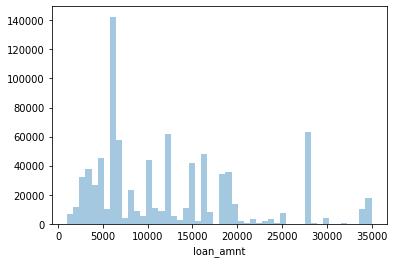

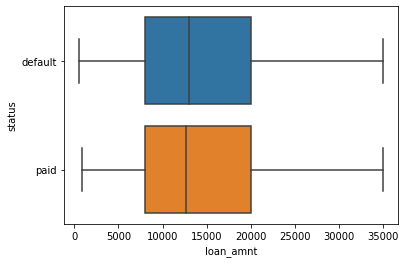

In [43]:
dist1('loan_amnt')
plot1('loan_amnt')
skew('loan_amnt')
df['loan_amnt'].describe()

**4.4 funded_amnt, funded_amnt_inv**

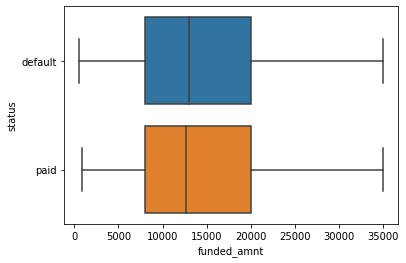

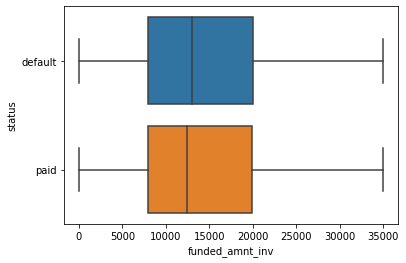

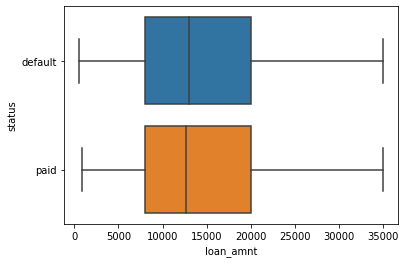

In [44]:
df['check'] = np.where(df.loan_amnt == df.funded_amnt, True, np.nan)
df['check2'] = np.where(df.loan_amnt == df.funded_amnt_inv, True, np.nan)
df['check'].isnull().sum()
df['check2'].isnull().sum()
plot1('funded_amnt')
plot1('funded_amnt_inv')
plot1('loan_amnt')

**For the funded_amnt and funded_amnt_inv are the amounts committed at the time and as per the dictionary loan_amnt may change if at all the creditor decides to do so, taking this into consideration funded_amnt and funded_amnt_inv will be dropped. Since loan_amnt seems to be the final amount.**

**4.5 int_rate**

count   855969.000
mean        13.192
std          4.368
min          5.320
25%          9.990
50%         12.990
75%         15.990
max         28.990
Name: int_rate, dtype: float64
SKEW VALUE: 0.43334416133317955


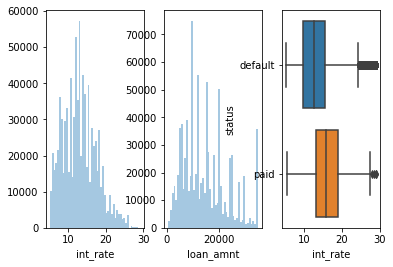

In [45]:
print(df['int_rate'].describe())

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
sns.distplot(df['int_rate'], kde=False, ax = ax1)

sns.distplot(df['loan_amnt'], kde=False, ax = ax2)

sns.boxplot(x='int_rate', y='status', data = df)
skew('int_rate')



**Upon analysis of the int_rate vs status of the loan there seems to be lower rate charged to default loans than paid off loans, which is highly unusual.**

**4.6 Installment**

count   855969.000
mean       436.238
std        243.727
min         15.690
25%        260.550
50%        382.550
75%        571.560
max       1445.460
Name: installment, dtype: float64
SKEW VALUE: 0.9378387199078426


<AxesSubplot:xlabel='installment', ylabel='status'>

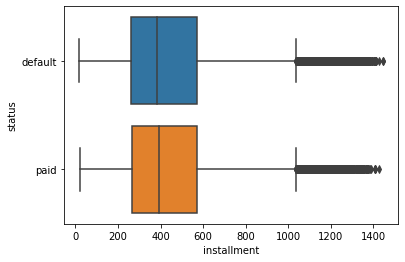

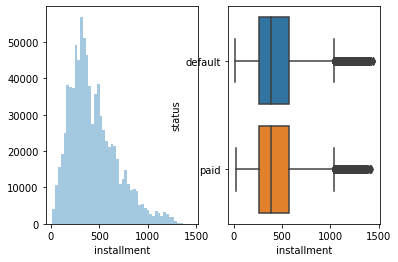

In [46]:
print(df['installment'].describe())
skew('installment')
plot1('installment')
fig,(ax1, ax2) = plt.subplots(1, 2)
sns.distplot(df['installment'], kde=False, ax = ax1)
sns.boxplot(x='installment', y='status', ax = ax2, data = df)



**4.7 grade**

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

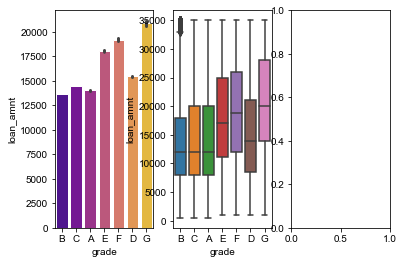

In [47]:
points = df['grade'].value_counts()

fig,(ax1, ax2, ax3) = plt.subplots(1, 3)
sns.set_style('darkgrid') 
sns.barplot(x ='grade', y ='loan_amnt', data = df, palette ='plasma', ax = ax1) 
sns.boxplot(x ='grade', y ='loan_amnt', data = df, ax = ax2) 
sns.barplot(x ='grade', y ='loan_amnt', data = df, palette ='plasma', ax = ax1) 


**By analysing the data it is clear, assuming higher grade is a customer with good credit score, most of the loans were given to customers with a higher grade.**

**4.8 sub_grade**

<AxesSubplot:xlabel='sub_grade', ylabel='loan_amnt'>

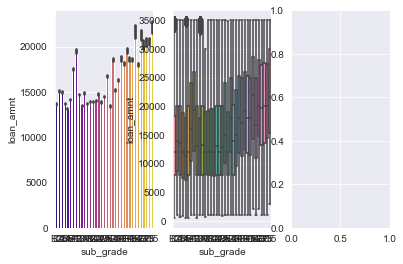

In [48]:
points = df['sub_grade'].value_counts()
fig,(ax1, ax2, ax3) = plt.subplots(1, 3)
sns.set_style('darkgrid') 
sns.barplot(x ='sub_grade', y ='loan_amnt', data = df, palette ='plasma', ax = ax1) 
sns.boxplot(x ='sub_grade', y ='loan_amnt', data = df, ax = ax2) 


**By analysing both grade and sub_grade columns we come to a conclusion that grade is further diluted into sub_grade and is similar to the grade column.**

**4.9 emp_length**

<AxesSubplot:xlabel='emp_length', ylabel='loan_amnt'>

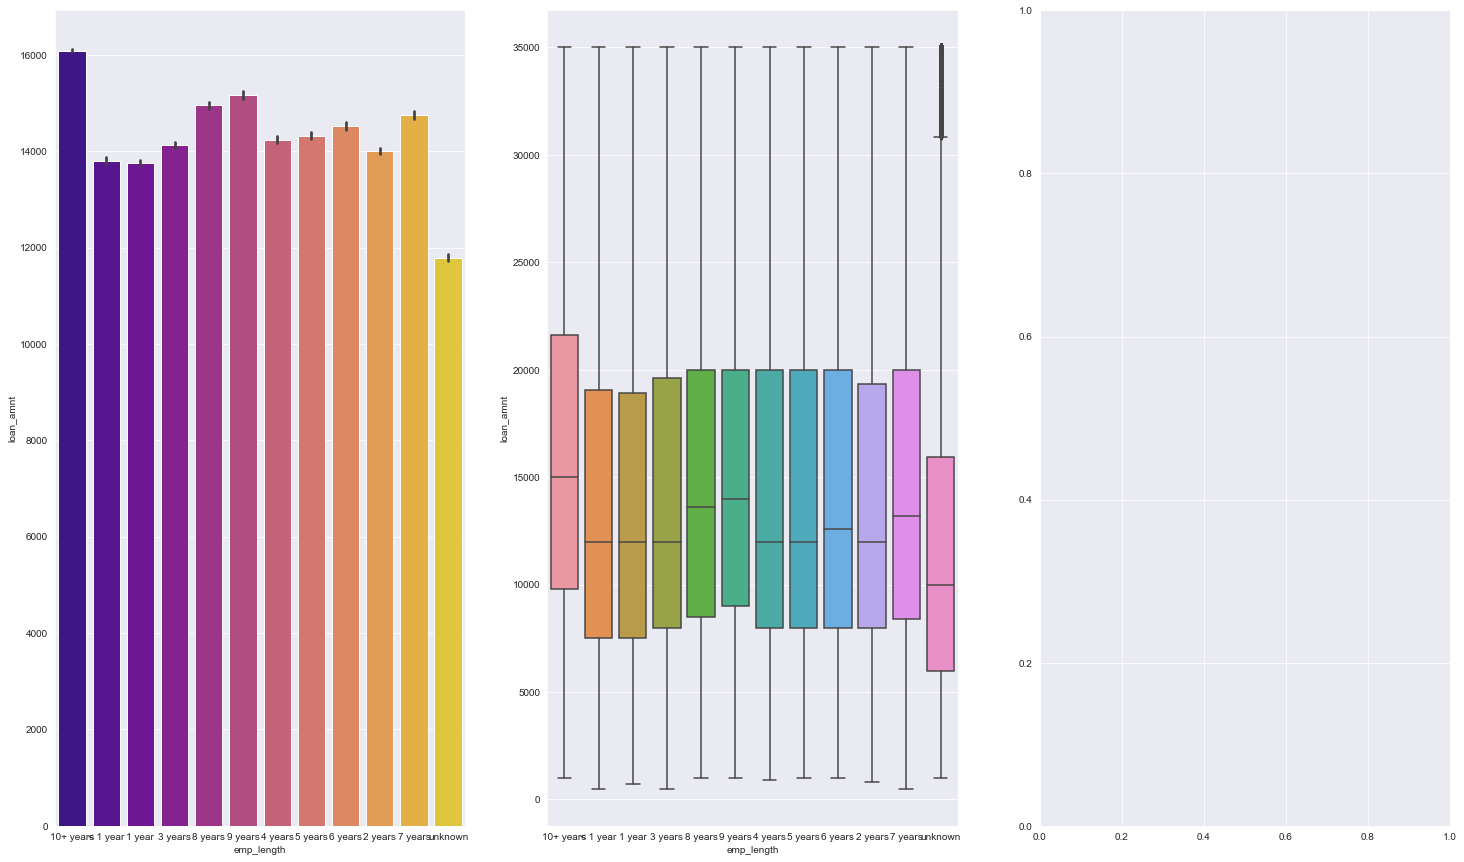

In [49]:
df['emp_length'].describe()
fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 15))
sns.set_style('darkgrid') 
sns.barplot(x ='emp_length', y ='loan_amnt', data = df, palette ='plasma', ax = ax1) 
sns.boxplot(x ='emp_length', y ='loan_amnt', data = df, ax = ax2) 


**Upon analysis there seems to be no major difference in year of employment and loan amount disbursed. However there is still some incremental increase in amount disbursed in year 7,8,9 which is a good indicator.**

**4.10 home_ownership**

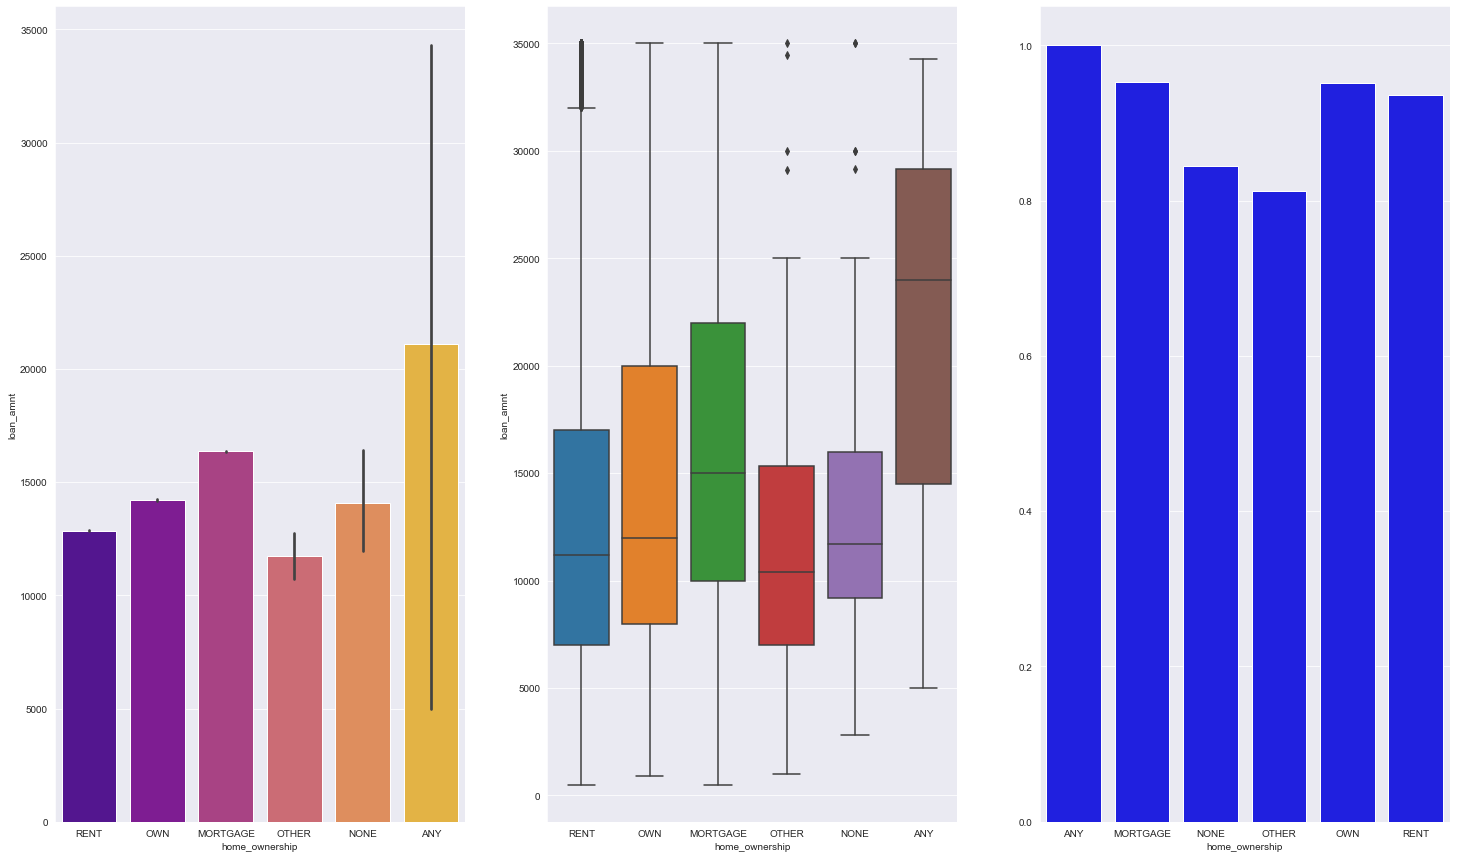

In [50]:
fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 15))
sns.set_style('darkgrid') 
sns.barplot(x ='home_ownership', y ='loan_amnt', data = df, palette ='plasma', ax = ax1) 
sns.boxplot(x ='home_ownership', y ='loan_amnt', data = df, ax = ax2) 
points = df['home_ownership'].value_counts()
points
defaults = df.groupby('home_ownership')['status'].value_counts(normalize=True).loc[:,'default']
sns.barplot(x=defaults.index, y=defaults.values, color='b')
plt.show()


**4.11 verification_status**


<AxesSubplot:xlabel='verification_status'>

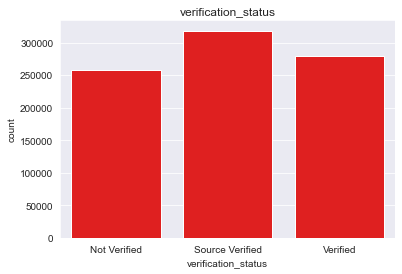

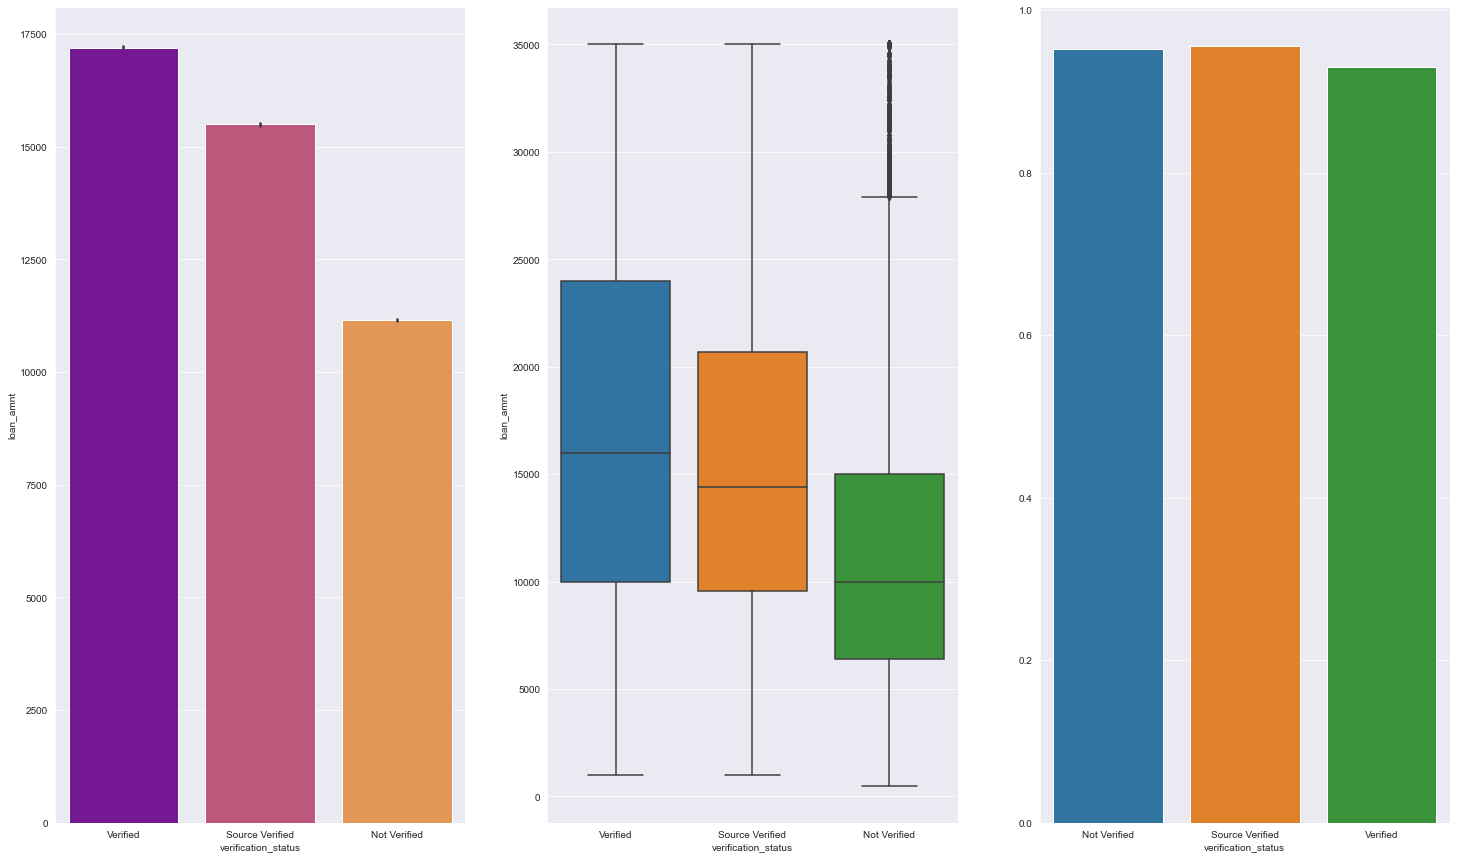

In [51]:
points = df['verification_status'].value_counts()
points
col_name = df.verification_status
dist0('verification_status')
fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 15))
sns.set_style('darkgrid') 
sns.barplot(x ='verification_status', y ='loan_amnt', data = df, palette ='plasma', ax = ax1) 
sns.boxplot(x ='verification_status', y ='loan_amnt', data = df, ax = ax2) 
charge_off_rates = df.groupby(col_name)['status'].value_counts(normalize=True).loc[:,'default']
sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values,  ax=ax3)


**4.12 pymnt_plan**

In [52]:
points = df['pymnt_plan'].value_counts()
points



n    855964
y         5
Name: pymnt_plan, dtype: int64

**pymnt_plan seems to have more than 99% n values this coulmn will be dropped**

**4.13 purpose**

<AxesSubplot:xlabel='purpose'>

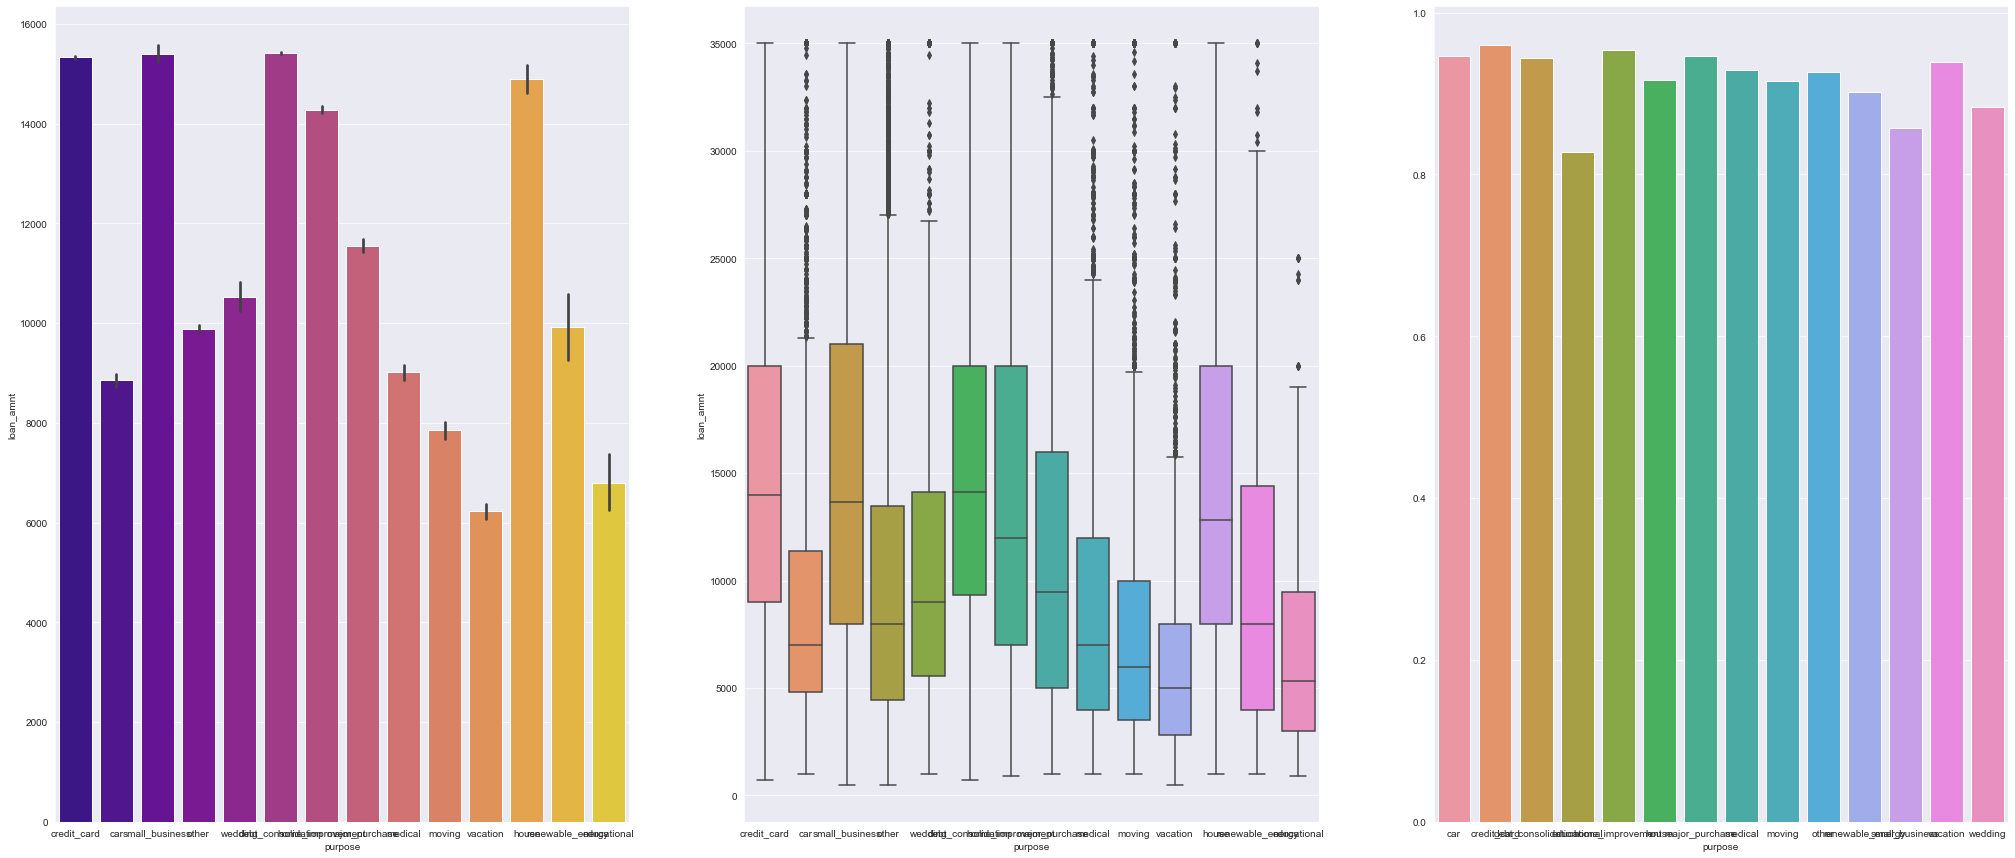

In [53]:
points = df['purpose'].value_counts()
points
fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(35, 15))
sns.set_style('darkgrid') 
sns.barplot(x ='purpose', y ='loan_amnt', data = df, palette ='plasma', ax = ax1) 
sns.boxplot(x ='purpose', y ='loan_amnt', data = df, ax = ax2) 
charge_off_rates = df.groupby(df.purpose)['status'].value_counts(normalize=True).loc[:,'default']
sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values,  ax=ax3)


**4.14 title**

In [54]:
points = df['title'].value_counts()
points


Debt consolidation                   398094
Credit card refinancing              159228
Home improvement                      38633
Other                                 30522
Debt Consolidation                    15519
                                      ...  
Debt Pay Off and Car Finance Loan         1
Small Wedding Loan                        1
reduce Debt                               1
payback1                                  1
Business Start                            1
Name: title, Length: 60737, dtype: int64

**4.15 zip_code**

In [55]:
points = df['zip_code'].value_counts().nunique()
points



685

**4.16 addr_state**

In [56]:
points = df['addr_state'].value_counts().nunique()
points

df.groupby('addr_state')['status'].describe()

,count,unique,top,freq
addr_state,,,,
AK,2134,2,default,2036
AL,10732,2,default,10061
AR,6399,2,default,6054
AZ,19693,2,default,18605
CA,125172,2,default,117629
CO,18211,2,default,17402
CT,13042,2,default,12420
DC,2382,2,default,2293
DE,2402,2,default,2276


**4.17 earliest_cr_line**

<AxesSubplot:xlabel='earliest_cr_line', ylabel='loan_amnt'>

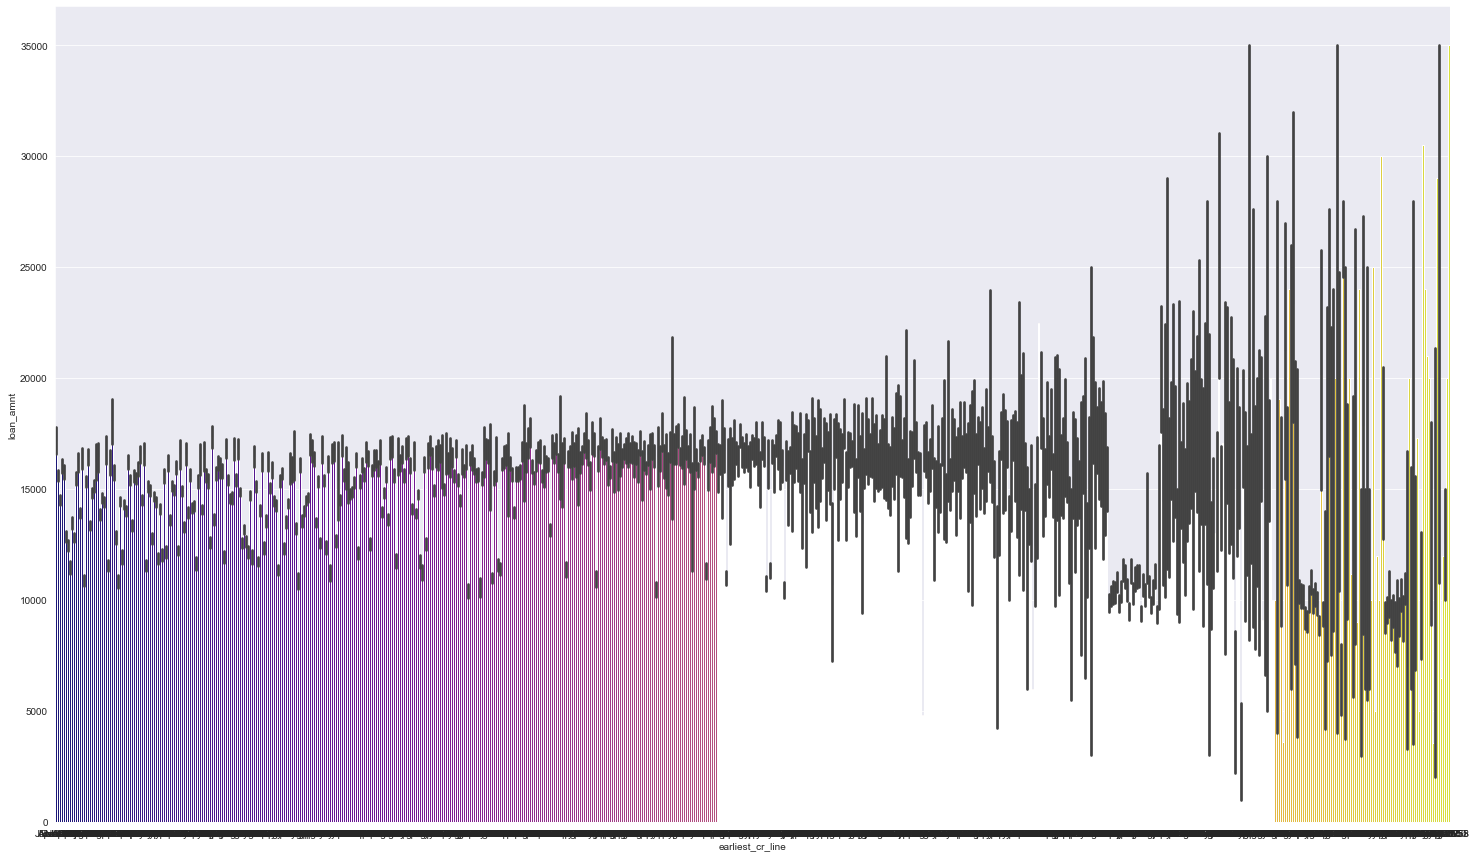

In [57]:
df['earliest_cr_line'].describe()
fig, ax = plt.subplots(figsize=(25, 15))
sns.set_style('darkgrid') 
sns.barplot(x ='earliest_cr_line', y ='loan_amnt', data = df, palette ='plasma') 


**4.18 open_acc**

<AxesSubplot:xlabel='open_acc', ylabel='loan_amnt'>

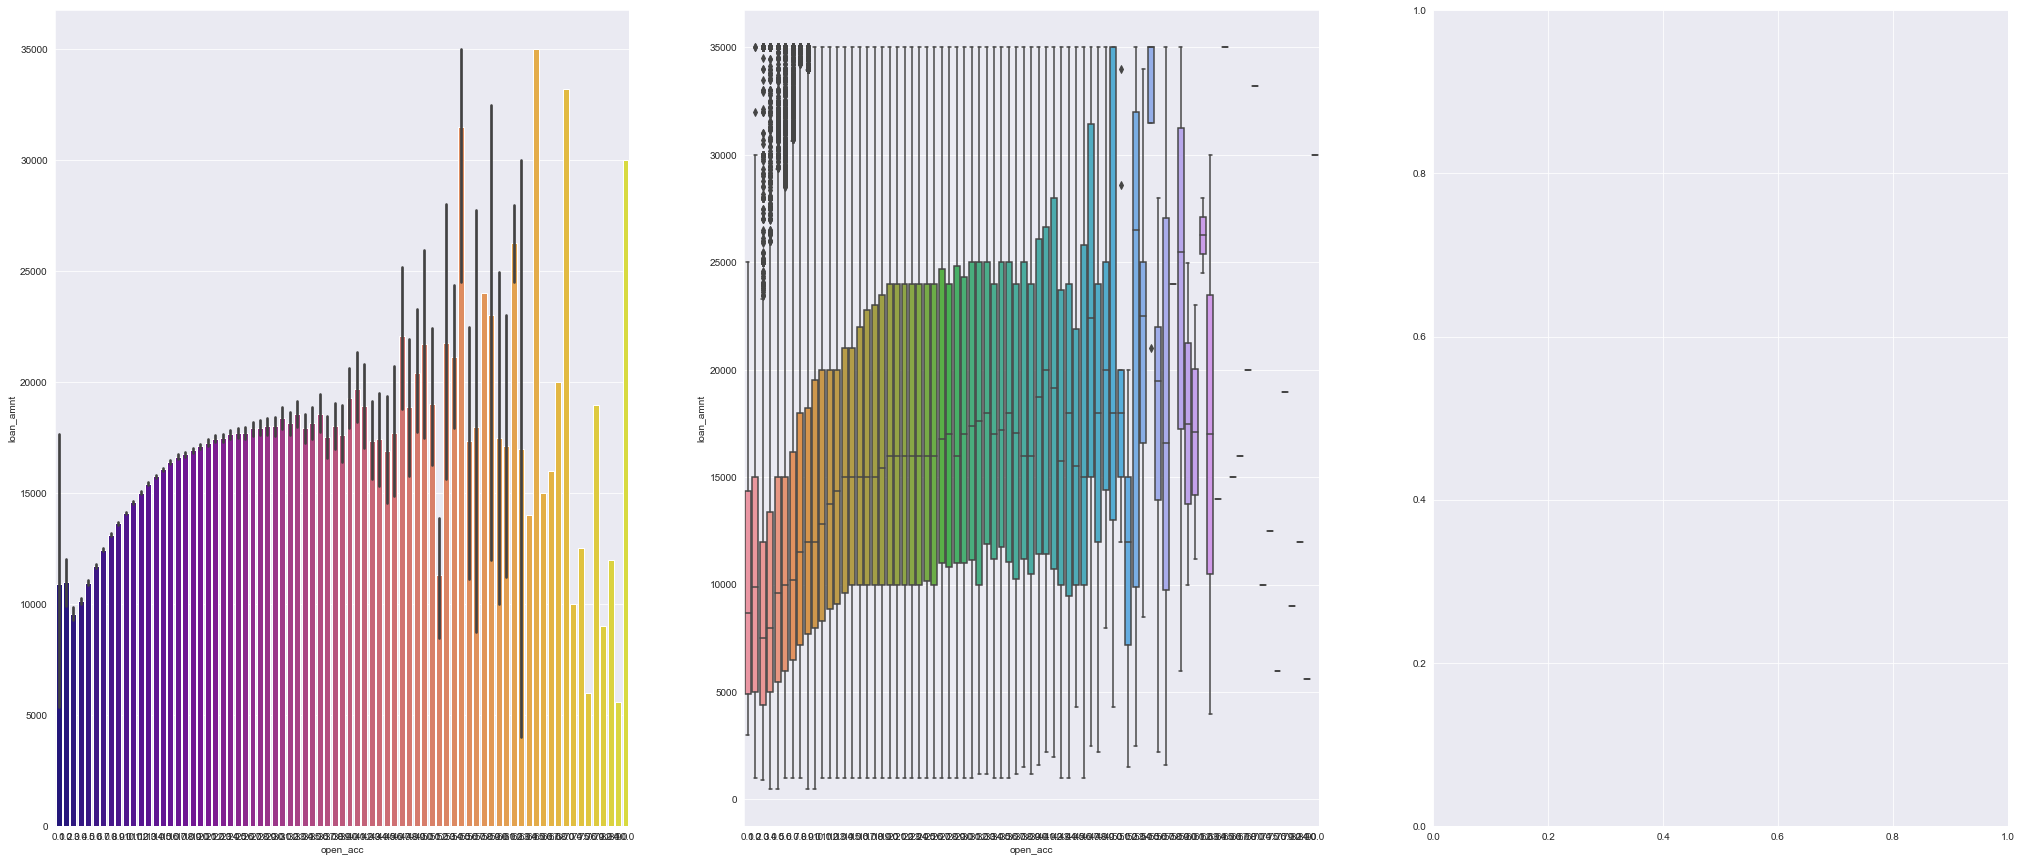

In [58]:
df['open_acc'].describe()
fig,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(35, 15))
sns.set_style('darkgrid') 
sns.barplot(x ='open_acc', y ='loan_amnt', data = df, palette ='plasma', ax = ax1) 
sns.boxplot(x ='open_acc', y ='loan_amnt', data = df, ax = ax2) 


**4.19 pub_rec**

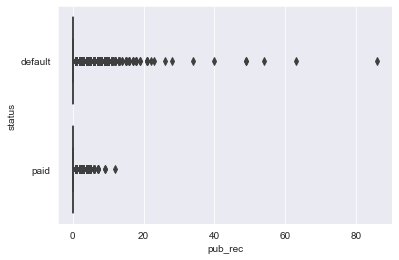

In [59]:
df.pub_rec.describe()
plot1('pub_rec')



**pub_rec public records is a good indicator that shows majority of the defaulters have bad public records**

**4.20 total_acc**

SKEW VALUE: 0.8912146778548425


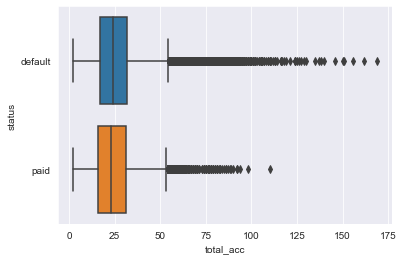

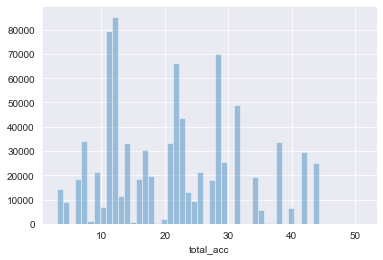

In [60]:
df.total_acc.describe()
plot1('total_acc')
skew('total_acc')
dist1('total_acc')


**4.1.1 Categorical Encoding Ordinal Features**

In [61]:
#grade
print(df.grade.unique().tolist())
grade_map = {'A':7, 'B':6, 'C':5, 'D':4,'E':3, 'F':2, 'G':1}
df['grade'] = df['grade'].map(grade_map)

#subgrade
print(df.sub_grade.unique().tolist())
sub_grade_map = {'A1':35, 'A2':34, 'A3':33, 'A4':32, 'A5':31,
                 'B1':30, 'B2':29, 'B3':28,'B4':27, 'B5':26, 
                 'C1':25, 'C2':24, 'C3':23, 'C4':22, 'C5':21, 
                 'D1':20, 'D2':19,'D3':18, 'D4':17, 'D5':16,
                 'E1':15, 'E2':14, 'E3':13, 'E4':12, 'E5':11, 
                 'F1':10, 'F2':9, 'F3':8, 'F4':7, 'F5':6,
                 'G1':5, 'G2':4, 'G3':3, 'G4':2, 'G5':1
                 }
df['sub_grade'] = df['sub_grade'].map(sub_grade_map)

#emp_length
print(df.emp_length.unique().tolist())
emp_length_map = {'10+ years': 13, '9 years': 12, '8 years': 11, '7 years': 10, '6 years': 9, '5 years':8, '4 years':7,
                  '3 years':6, '4 years':5, '3 years':4, '2 years': 3, '1 year': 2, '< 1 year':1, 'unknown':0
    
}
df['emp_length'] = df['emp_length'].map(emp_length_map)


#paymnt_plan
print(df.pymnt_plan.unique().tolist())
pymnt_plan_map = { 'n':0, 'y':1
    
}
df['pymnt_plan']  = df['pymnt_plan'].map(pymnt_plan_map)

non_numeric = df.select_dtypes(include = 'object')


['B', 'C', 'A', 'E', 'F', 'D', 'G']
['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1', 'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3', 'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1', 'F5', 'G5']
['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years', '4 years', '5 years', '6 years', '2 years', '7 years', 'unknown']
['n', 'y']


**4.2.1 Dummy Variable Creation for features that do not have a set relationship.**

In [62]:
#forward fill last_pymnt_d before creating dummies
df.isnull().sum()
cols = ['last_pymnt_d']
df.loc[:,cols] = df.loc[:,cols].ffill()
df.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_length                        0
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
pymnt_plan                        0
purpose                           0
title                             0
zip_code                          0
addr_state                        0
dti                               0
earliest_cr_line                  0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                        0
total_acc                         0
out_prncp                         0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv             

In [63]:
non_numeric = df.select_dtypes(include = 'object')

df = pd.get_dummies(df, columns =['home_ownership', 'verification_status', 'purpose', 'addr_state'])


**4.3.1 Splitting Date by heirarchy year>month into separate columns.**

In [64]:
#earliest_cr_line
earliest_cr_line_list = df.earliest_cr_line.str.split('-', expand = True)
df['earliest_cr_line_month'] = earliest_cr_line_list[0]
df['earliest_cr_line_year'] = earliest_cr_line_list[1]

print(df.earliest_cr_line_month.unique().tolist())
earliest_cr_line_month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4,'May':5, 'Jun':6, 'Jul':7,
            'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df['earliest_cr_line_month'] = df['earliest_cr_line_month'].map(earliest_cr_line_month_map)
df['earliest_cr_line_month'] = df['earliest_cr_line_month'].astype('int64')
df['earliest_cr_line_year'] = df['earliest_cr_line_year'].astype('int64')



['Jan', 'Apr', 'Nov', 'Feb', 'Jul', 'Sep', 'Oct', 'May', 'Aug', 'Jun', 'Dec', 'Mar']


**4.3.2 last_pymnt_d**

In [65]:
last_pymnt_d_list = df.last_pymnt_d.str.split('-', expand = True)
df['last_pymnt_d_month'] = last_pymnt_d_list[0]
df['last_pymnt_d_year'] = last_pymnt_d_list[1]
print(df.last_pymnt_d_month.unique().tolist())
last_pymnt_d_month_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4,'May':5, 'Jun':6, 'Jul':7,
            'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

df['last_pymnt_d_month'] = df['last_pymnt_d_month'].map(last_pymnt_d_month_map)
df['last_pymnt_d_month']
df['last_pymnt_d_year'] = df['last_pymnt_d_year'].astype('int64')



['Jan', 'Apr', 'Jun', 'Nov', 'Sep', 'Jul', 'Oct', 'May', 'Feb', 'Aug', 'Dec', 'Mar']


**4.3.3 last_credit_pull_d**

In [66]:
last_credit_pull_d_list = df.last_credit_pull_d.str.split('-', expand = True)
df['last_credit_pull_d_month'] = last_credit_pull_d_list[0]
df['last_credit_pull_d_year'] = last_credit_pull_d_list[1]
cols = ['last_credit_pull_d_month']
df.loc[:,cols] = df.loc[:,cols].ffill()
print(df.last_credit_pull_d_month.unique().tolist())
last_credit_pull_d_map = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4,'May':5, 'Jun':6, 'Jul':7,
            'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

df['last_credit_pull_d_month'] = df['last_credit_pull_d_month'].map(last_credit_pull_d_map)
cols_last_credit_pull_d_year = ['last_credit_pull_d_year']
df.loc[:,cols_last_credit_pull_d_year] = df.loc[:,cols_last_credit_pull_d_year].ffill()

df['last_credit_pull_d_year'] = df['last_credit_pull_d_year'].astype('int64')
df['last_credit_pull_d_month']


['Jan', 'Sep', 'Dec', 'Aug', 'Mar', 'Nov', 'Apr', 'May', 'Jul', 'Oct', 'Jun', 'Feb']


0         1
1         9
2         1
3         1
4         1
         ..
855964    1
855965    1
855966    1
855967    1
855968    1
Name: last_credit_pull_d_month, Length: 855969, dtype: int64

**4.4.1 dropping title, zipcode as there are many levels to it, as well as earliest_cr_line,  last_paymnt_dt, last_cr_pull_dt as the columns have already been split.** 

In [69]:
rejected_cols = ['title', 'zip_code', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']
for cols in rejected_cols:
    df = df.drop(cols, axis = 1)
   

KeyError: "['title'] not found in axis"

In [68]:
non_numeric = df.select_dtypes(include = 'object')
print(non_numeric)

         issue_d   status
0       Dec-2011  default
1       Dec-2011     paid
2       Dec-2011  default
3       Dec-2011  default
4       Dec-2011  default
...          ...      ...
855964  Jan-2015  default
855965  Jan-2015  default
855966  Jan-2015  default
855967  Jan-2015  default
855968  Jan-2015  default

[855969 rows x 2 columns]


In [70]:
df.isnull().sum()

loan_amnt                                  0
funded_amnt                                0
funded_amnt_inv                            0
int_rate                                   0
installment                                0
grade                                      0
sub_grade                                  0
emp_length                                 0
annual_inc                                 0
issue_d                                    0
pymnt_plan                                 0
dti                                        0
open_acc                                   0
pub_rec                                    0
revol_bal                                  0
revol_util                                 0
total_acc                                  0
out_prncp                                  0
out_prncp_inv                              0
total_pymnt                                0
total_pymnt_inv                            0
total_rec_prncp                            0
total_rec_

In [71]:
df['tot_coll_amt'].fillna(value = 0, inplace = True)
df['tot_cur_bal'].fillna(value = 0, inplace = True)
df['total_rev_hi_lim'].fillna(value = 0, inplace = True)



In [ ]:
#df = df.drop('status', axis = 1)
#df = df.drop('check', axis = 1)
#df = df.drop('check2', axis = 1)
df.isnull().sum()


**4.5.1 Exporting Cleaned Data.**

In [2]:
df.to_csv(r'C:\Users\Jason Dias\cleaned_data_checkpoint1.csv', index = False)

NameError: name 'df' is not defined

In [17]:
df_cleaned = pd.read_csv("C:\\Users\\Jason Dias\\cleaned_data_checkpoint1.csv", skipinitialspace=True)
df_cleaned.dtypes

loan_amnt                              float64
funded_amnt                            float64
funded_amnt_inv                        float64
int_rate                               float64
installment                            float64
grade                                    int64
sub_grade                                int64
emp_length                               int64
annual_inc                             float64
issue_d                                 object
pymnt_plan                               int64
dti                                    float64
open_acc                               float64
pub_rec                                float64
revol_bal                              float64
revol_util                             float64
total_acc                              float64
out_prncp                              float64
out_prncp_inv                          float64
total_pymnt                            float64
total_pymnt_inv                        float64
total_rec_prn

In [92]:
from scipy.stats import pearsonr 
for col in df_cleaned.columns:
    if col == 'issue_d':
        continue
    first = df_cleaned[col]
    second = df_cleaned['default_ind']
    corr, _= pearsonr(first, second)
    if corr > 0.1:
        print(col,corr)
    else:
        continue


int_rate 0.15503707005602507
total_rec_late_fee 0.14076021198489977
recoveries 0.4757380487507909


c:\users\jason dias\appdata\local\programs\python\python38\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


default_ind 0.9999999999996629
last_pymnt_d_month 0.10768459935992478
last_credit_pull_d_month 0.1765574207278292


<AxesSubplot:>

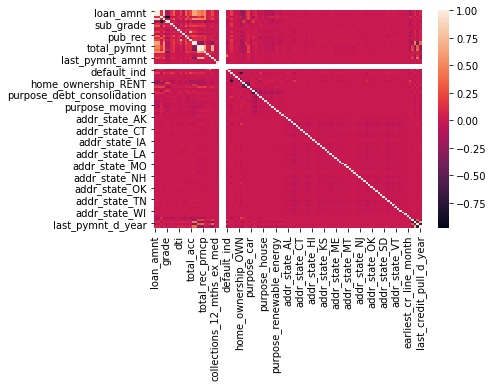

In [7]:
sns.heatmap(corr)

**Clearing temporary columns created as well as issue_D based on which split was performed**

In [18]:
df_cleaned['issue_d'] = pd.to_datetime(df_cleaned['issue_d'])
df_cleaned

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_length,annual_inc,issue_d,...,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,5000.000,5000.000,4975.000,10.650,162.870,6,29,13,24000.000,2011-12-01,...,0,0,0,0,1,1985,1,2015,1,2016
1,2500.000,2500.000,2500.000,15.270,59.830,5,22,1,30000.000,2011-12-01,...,0,0,0,0,4,1999,4,2013,9,2013
2,2400.000,2400.000,2400.000,15.960,84.330,5,21,13,12252.000,2011-12-01,...,0,0,0,0,11,2001,6,2014,1,2016
3,10000.000,10000.000,10000.000,13.490,339.310,5,25,13,49200.000,2011-12-01,...,0,0,0,0,2,1996,1,2015,1,2015
4,3000.000,3000.000,3000.000,12.690,67.790,6,26,2,80000.000,2011-12-01,...,0,0,0,0,1,1996,1,2016,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855964,10000.000,10000.000,10000.000,11.990,332.100,6,26,11,31000.000,2015-01-01,...,0,0,0,0,9,2004,1,2016,1,2016
855965,24000.000,24000.000,24000.000,11.990,797.030,6,26,13,79000.000,2015-01-01,...,0,0,0,0,3,1974,1,2016,1,2016
855966,13000.000,13000.000,13000.000,15.990,316.070,4,19,8,35000.000,2015-01-01,...,0,0,0,0,9,2003,1,2016,1,2016
855967,12000.000,12000.000,12000.000,19.990,317.860,3,13,2,64400.000,2015-01-01,...,0,0,0,0,10,2003,1,2016,1,2016


# 5.Model Building and Testing

**5.1 Splitting Data Based on Date**

In [19]:
df_train = df_cleaned[df_cleaned['issue_d'] <= 'May-2015']
df_train = df_train.drop('issue_d', axis = 1)
df_train
df_test = df_cleaned[df_cleaned['issue_d'] >= 'Jun-2015']
df_test = df_test.drop('issue_d', axis = 1)
df_test

df_train.isnull().sum()

loan_amnt                              0
funded_amnt                            0
funded_amnt_inv                        0
int_rate                               0
installment                            0
grade                                  0
sub_grade                              0
emp_length                             0
annual_inc                             0
pymnt_plan                             0
dti                                    0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
out_prncp                              0
out_prncp_inv                          0
total_pymnt                            0
total_pymnt_inv                        0
total_rec_prncp                        0
total_rec_int                          0
total_rec_late_fee                     0
recoveries                             0
last_pymnt_amnt 

In [ ]:
                            0
total_pymnt_inv                        0
total_rec_prncp                        0
total_rec_int                          0
total_rec_late_fee                     0
recoveries                             0
last_pymnt_amnt                        0
collections_12_mths_ex_med             0
acc_now_delinq                         0
tot_coll_amt                           0
tot_cur_bal                            0
total_rev_hi_lim                

In [42]:
from sklearn.preprocessing import StandardScaler
df_train_x = pd.DataFrame(df_train.drop('default_ind', axis = 1))
df_train_x
df_train_y = pd.DataFrame(df_train['default_ind'])
df_train_y
df_test_x = pd.DataFrame(df_test.drop('default_ind', axis = 1))
df_test_x
df_test_y = pd.DataFrame(df_test['default_ind'])
df_test_y

scaler = StandardScaler()


df_train_x_copy = df_train_x.copy()
df_test_x_copy = df_test_x.copy()


numericals = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment','grade','sub_grade','emp_length'
              ,'annual_inc','pymnt_plan','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv',
              'total_pymnt','total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
              'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'earliest_cr_line_month', 'earliest_cr_line_year',
              'last_pymnt_d_month','last_pymnt_d_year','last_credit_pull_d_month','last_credit_pull_d_year'
]



for col in numericals:
    scale = StandardScaler().fit(df_train_x_copy[[col]])
    df_train_x_copy[col] = scale.transform(df_train_x_copy[[col]])
    df_test_x_copy[col] = scale.transform(df_test_x_copy[[col]])
    


In [6]:
df_test_x_copy.shape

(256991, 110)

In [7]:
df_train_x_copy.shape

(598978, 110)

In [7]:
df_train_x_copy.to_csv(r'C:\Users\Jason Dias\train_x_copy.csv', index = False)
df_test_x_copy.to_csv(r'C:\Users\Jason Dias\train_y_copy.csv', index = False)
df_train_y.to_csv(r'C:\Users\Jason Dias\df_train_y.csv', index = False)
df_test_y.to_csv(r'C:\Users\Jason Dias\df_test_y.csv', index = False)

**5.2 LogisticsRegression Model building.**

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

model = LogisticRegression(max_iter=100)
model.fit(df_train_x_copy, df_train_y)
prediction = model.predict(df_test_x_copy)


c:\users\jason dias\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
c:\users\jason dias\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
accuracy = accuracy_score(df_test_y, prediction)

print(accuracy)

print(confusion_matrix(df_test_y, prediction))
print(accuracy3)
print('F1 SCORE:', f1_score(df_test_y, prediction))
print('PRECISION SCORE',precision_score(df_test_y, prediction))
print('ROC_AUC Score', roc_auc_score(df_test_y, prediction))

0.9995174928304882
[[256620     60]
 [    64    247]]
None
F1 SCORE: 0.7993527508090615
PRECISION SCORE 0.8045602605863192
ROC_AUC Score 0.8969892322794105


**5.2.1 Cross Validation and Best Model Search.**

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LogisticRegression


df_train_x_copy,df_train_y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

model = LogisticRegression()

scores = cross_val_score(model, df_train_x_copy,df_train_y, scoring='roc_auc', cv=cv, n_jobs=-1)

print(scores.mean())

0.9439793236794886


In [22]:
from sklearn.model_selection import GridSearchCV
c = [1,10]
grid = dict(solver = ['lbfgs','rbf'], penalty = ['l2','l1'], C =c)
grid_search = GridSearchCV(estimator = LogisticRegression(), param_grid = grid, n_jobs = -1, cv = 10, scoring = 'roc_auc')
result = grid_search.fit(df_train_x_copy, df_train_y)
print('Best Score:',result.best_score_)
print('Best parameters of model:',result.best_params_)
print('Best Estimator :', result.best_estimator_)


c:\users\jason dias\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Best Score: 0.995525608303365
Best parameters of model: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Estimator : LogisticRegression(C=1)


c:\users\jason dias\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


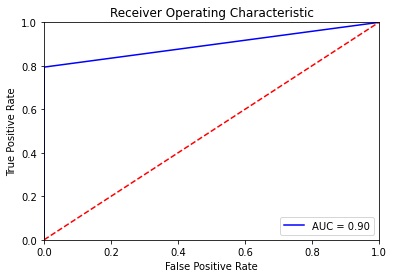

In [40]:
fpr1, tpr1, threshold1 = metrics.roc_curve(df_test_y, prediction)
roc_auc1 = metrics.auc(fpr1, tpr1)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**5.3 RandomForestClassifier Model building.**

In [8]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(df_train_x_copy, df_train_y)

prediction2 = model2.predict(df_test_x_copy)


<ipython-input-8-5bfeb85f4679>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(df_train_x_copy, df_train_y)


In [13]:
accuracy = accuracy_score(df_test_y, prediction2)
print(confusion_matrix(df_test_y, prediction2))
print("Accuracy:",metrics.accuracy_score(df_test_y, prediction2))
print('F1 SCORE:', f1_score(df_test_y, prediction2))
print('PRECISION SCORE',precision_score(df_test_y, prediction2))
print('ROC_AUC Score', roc_auc_score(df_test_y, prediction2))


[[233450  23230]
 [     2    309]]
Accuracy: 0.9095999470798588
F1 SCORE: 0.02591194968553459
PRECISION SCORE 0.013127150686095415
ROC_AUC Score 0.9515336698590511


In [151]:
print(dir(model2))

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_y_class_weight', 'apply', 'base_estimator', 'base_estimator_', 'bootstrap', 'ccp_alpha', 'class_weight', 'classes_', 'criterion', 'decision_path', 'estimator_params', 'estimators_', 'feature_importances_', 'fit', 'get_params', 'max_depth', 'max_featur

**5.3.1 Cross Validation and Best Model Search.**

In [14]:
from sklearn.datasets import make_classification

df_train_x_copy,df_train_y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

model2 = model2 

scores = cross_val_score(model2, df_train_x_copy,df_train_y, scoring='roc_auc', cv=cv, n_jobs=-1)

print(scores.mean())

0.9778731043204225


In [43]:
from sklearn.model_selection import GridSearchCV

grid_search2 = GridSearchCV(estimator = RandomForestClassifier(n_jobs=-1, random_state=1,bootstrap=True, class_weight=None, criterion='gini'), param_grid = {'n_estimators': [25], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6,7], 'criterion': ['gini', 'entropy']}, n_jobs = -1, cv = 3, scoring = 'roc_auc')
result2 = grid_search2.fit(df_train_x_copy, df_train_y)
print('Best Score:',result2.best_score_)
print('Best parameters of model:',result2.best_params_)
print('Best Estimator :', result2.best_estimator_)


c:\users\jason dias\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Best Score: 0.9934674189004818
Best parameters of model: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 25}
Best Estimator : RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=25,
                       n_jobs=-1, random_state=1)


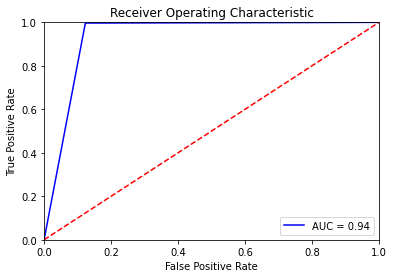

In [272]:
fpr2, tpr2, threshold2 = metrics.roc_curve(df_test_y, prediction2)
roc_auc = metrics.auc(fpr2, tpr2)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr2, tpr2, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**5.4 DecisionTreeClassifier Model Building.**

In [24]:
from sklearn.tree import DecisionTreeClassifier

model3 = DecisionTreeClassifier()

model3.fit(df_train_x_copy, df_train_y)
prediction3 = model3.predict(df_test_x_copy)


In [25]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(df_test_y, prediction3))
print('F1 SCORE:', f1_score(df_test_y, prediction3))
print('PRECISION SCORE',precision_score(df_test_y, prediction3))
print('ROC_AUC Score', roc_auc_score(df_test_y, prediction3))

Accuracy: 0.981769789603527
F1 SCORE: 0.11419928152769901
PRECISION SCORE 0.06066693451185215
ROC_AUC Score 0.9764219288896506


**5.4.1 Cross Validation And Best Model Search.**

In [26]:
df_train_x_copy,df_train_y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)


scores = cross_val_score(model3, df_train_x_copy,df_train_y, scoring='roc_auc', cv=cv, n_jobs=-1)

print(scores.mean())

0.8191050534405234


In [32]:
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier()
parameters={'min_samples_leaf' : range(1,10,2),'max_depth': range(1,10,2)}
grid_search3 = GridSearchCV(estimator =  tree, param_grid = parameters, cv = 3, scoring = 'roc_auc', n_jobs = -1)
result3 = grid_search3.fit(df_train_x_copy, df_train_y)
print('Best Score:',result3.best_score_)
print('Best parameters of model:',result3.best_params_)
print('Best Estimator :', result3.best_estimator_)

Best Score: 0.9970498076303945
Best parameters of model: {'max_depth': 9, 'min_samples_leaf': 9}
Best Estimator : DecisionTreeClassifier(max_depth=9, min_samples_leaf=9)


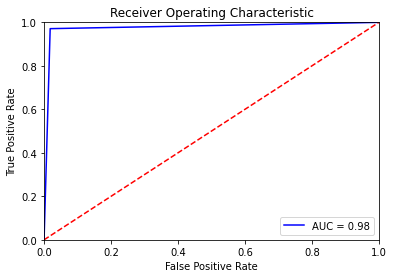

In [30]:
fpr3, tpr3, threshold3 = metrics.roc_curve(df_test_y, prediction3)
roc_auc = metrics.auc(fpr3, tpr3)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr3, tpr3, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Conclusion

**Based on the evaluation the following model with their respective parameters is best performing.**

In [285]:
print('Best Score:',result2.best_score_)
print('Best parameters of model:',result2.best_params_)
print('Best Estimator :', result2.best_estimator_)

final_model = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=200)

Best Score: 0.9761990396158463
Best parameters of model: {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 200}
Best Estimator : RandomForestClassifier(criterion='entropy', max_depth=8, max_features='sqrt',
                       n_estimators=200)


**Calling grid_search of best model which will automatically call best parameters onto final test data.**

**Calling Best Parameters of Log model onto final test set.**

In [35]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
pred1 = grid_search.predict(df_test_x_copy)
accuracy1 = print("Accuracy:",metrics.accuracy_score(df_test_y, pred1))
print(accuracy1)
print('F1 SCORE:', f1_score(df_test_y, pred1))
print('PRECISION SCORE',precision_score(df_test_y, pred1))
print('ROC_AUC Score', roc_auc_score(df_test_y, pred1))



Accuracy: 0.9995174928304882
None
F1 SCORE: 0.7993527508090615
PRECISION SCORE 0.8045602605863192
ROC_AUC Score 0.8969892322794105


**Random Forest Classifier**

In [44]:
pred2 = grid_search2.predict(df_test_x_copy)
accuracy2 = print("Accuracy:",metrics.accuracy_score(df_test_y, pred2))
print(accuracy2)
print('F1 SCORE:', f1_score(df_test_y, pred2))
print('PRECISION SCORE',precision_score(df_test_y, pred2))
print('ROC_AUC Score', roc_auc_score(df_test_y, pred2))


Accuracy: 0.9995914253806554
None
F1 SCORE: 0.8154657293497364
PRECISION SCORE 0.8992248062015504
ROC_AUC Score 0.8729397069780983


**Decision Tree Classfier**

In [33]:
pred3 = grid_search3.predict(df_test_x_copy)
accuracy3 = print("Accuracy:",metrics.accuracy_score(df_test_y, pred3))


Accuracy: 0.9999455233840874
None
F1 SCORE: 0.9772727272727273
PRECISION SCORE 0.9868852459016394
ROC_AUC Score 0.9839150377789703
